### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# # change directory to 'master_study/analysis'
# os.chdir('master_study/analysis')

# Local imports
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



In [2]:
# Define study
STUDY_NAME = "emit_nb_scan_50cm_2024_very_agressive"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0008/config_final.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(7)

df


normalized amplitude in xy-plane  \
beam  name base collider qx     qy     on_x1 num_particles_per_bunch nemitt_x                                     
lhcb1 base_collider      62.318 60.323 80.0  150000000.0             0.000002                           10.4375   
                                                                     0.000002                            9.8750   
                                                                     0.000002                           10.1875   
                                                                     0.000002                           10.0625   
                                                                     0.000002                            9.1875   
...                                                                                                         ...   
                                             250000000.0             0.000003                            8.1250   
                                                                     0.000003                            7.9375   
                                                                     0.000003                            7.5625   
                                                                     0.000003                            8.0000   
                                                                     0.000003                            7.6875   

                                                                                   qx  \
beam  name base collider qx     qy     on_x1 num_particles_per_bunch nemitt_x           
lhcb1 base_collider      62.318 60.323 80.0  150000000.0             0.000002  62.318   
                                                                     0.000002  62.318   
                                                                     0.000002  62.318   
                                                                     0.000002  62.318   
                                                                     0.000002  62.318   
...                                                                               ...   
                                             250000000.0             0.000003  62.318   
                                                                     0.000003  62.318   
                                                                     0.000003  62.318   
                                                                     0.000003  62.318   
                                                                     0.000003  62.318   

                                                                                   qy  \
beam  name base collider qx     qy     on_x1 num_particles_per_bunch nemitt_x           
lhcb1 base_collider      62.318 60.323 80.0  150000000.0             0.000002  60.323   
                                                                     0.000002  60.323   
                                                                     0.000002  60.323   
                                                                     0.000002  60.323   
                                                                     0.000002  60.323   
...                                                                               ...   
                                             250000000.0             0.000003  60.323   
                                                                     0.000003  60.323   
                                                                     0.000003  60.323   
                                                                     0.000003  60.323   
                                                                     0.000003  60.323   

                                                                                dqx  \
beam  name base collider qx     qy     on_x1 num_particles_per_bunch nemitt_x         
lhcb1 base_collider      62.318 60.323 80.0  150000000.0             0.000002  10.0   
      

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="nemitt_x", columns="num_particles_per_bunch", values="normalized amplitude in xy-plane")
df_to_plot


num_particles_per_bunch,150000000.0,160000000.0,170000000.0,180000000.0,190000000.0,200000000.0,210000000.0,220000000.0,230000000.0,240000000.0,250000000.0
nemitt_x,,,,,,,,,,,
0.000002,10.4375,10.3125,10.0625,9.8750,10.4375,10.4375,10.0000,10.3125,9.7500,9.1250,9.7500
0.000002,9.8750,9.1875,9.8750,9.1250,10.1875,9.1875,10.1250,9.9375,8.7500,9.5625,8.6875
0.000002,10.1875,9.8750,9.5000,9.8125,9.5625,9.3750,8.6250,9.5625,9.1250,9.5625,9.3750
0.000002,10.0625,9.9375,10.0625,9.2500,9.5625,9.6250,9.6250,9.4375,9.2500,8.5000,8.9375
0.000002,9.1875,10.0625,9.3125,9.4375,9.6875,9.0000,9.3750,9.3750,9.0625,9.0625,9.1250
0.000002,9.6250,9.3125,9.1250,9.5625,9.4375,8.7500,8.4375,8.9375,9.0625,8.8125,8.8750
0.000002,8.8750,9.2500,8.7500,9.1875,9.2500,9.0000,9.0000,8.8125,9.1250,8.6875,8.8750
0.000002,8.8750,9.1875,9.1250,9.0625,9.3125,8.7500,8.9375,8.6875,8.5625,8.5625,9.0000
0.000002,9.2500,8.7500,8.1250,9.0000,8.2500,8.3125,8.9375,8.7500,8.1875,8.5000,8.2500


In [4]:
# Interpolate to fill internal missing values (do not extrapolate)
# df_to_plot = df_to_plot.interpolate(method='slinear', limit = 1)

In [5]:
df_to_plot.columns = df_to_plot.columns / 1e8

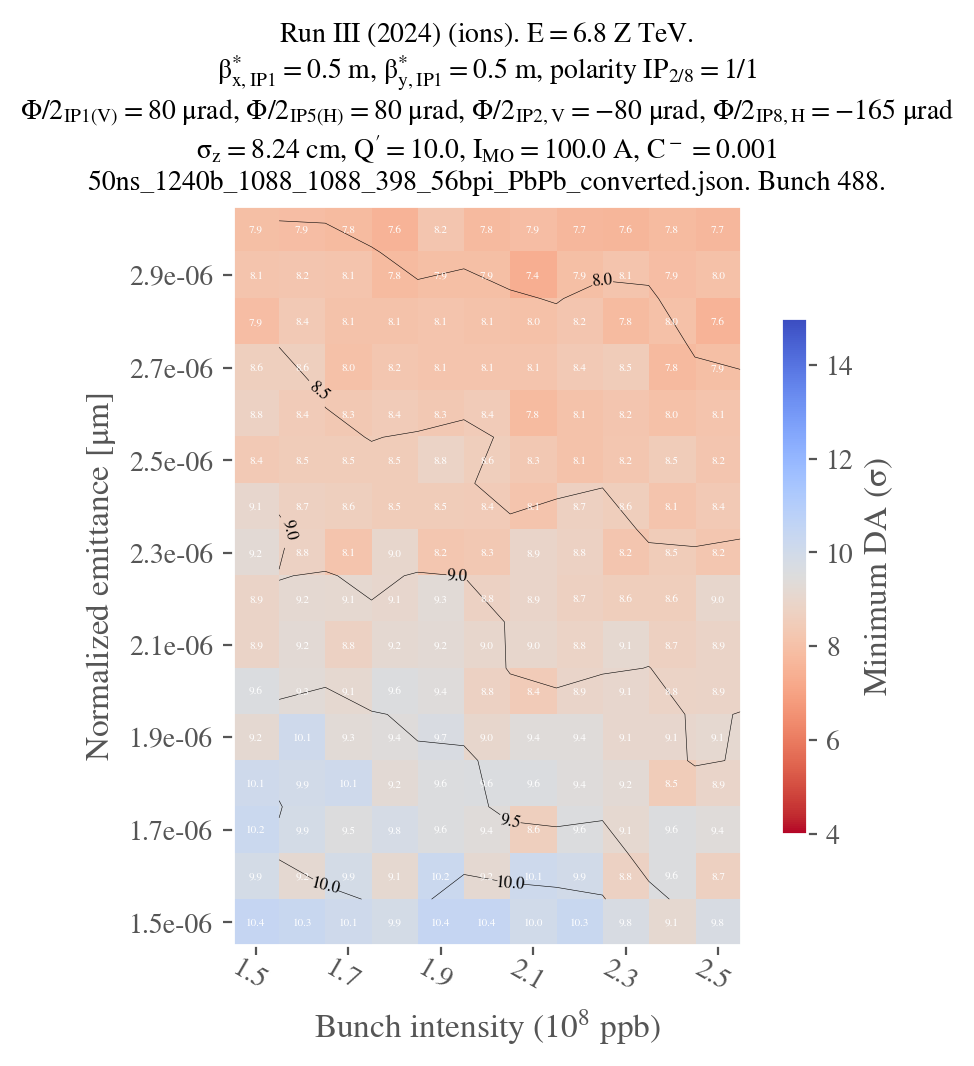

In [6]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

ylabel = r"Normalized emittance $[\mu m]$"
xlabel = r"Bunch intensity ($10^8$ ppb)"

analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.5,
    bety=0.5,
    Nb = True,
    green_contour = 2,
    extended_diagonal=False,
    #small_ext_diagonal=True,
    vmin = 4,
    vmax = 15.,
    smooth_symmetry = False,
    xlabel = xlabel,
    ylabel = ylabel,
    xaxis_on_top = False,
    plot_diagonal=False,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)